In [68]:
from langdetect import detect
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from mpl_toolkits.mplot3d import Axes3D

In [26]:
df=pd.read_csv("save_2022-12-01_local.csv")

In [27]:
df.head()

,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,2022-04-01,DON'T let the life of this earth delude you.\n...,en,0,1,0,ciira_cyrus,51358,49095,False,https://twitter.com/ciira_cyrus/status/1510024...,['MessageOfResurrection'],288,russia ukrain war
1,2022-04-01,@louvelune @KyivIndependent The communist Sovi...,en,0,0,1,CatManDoo18,964,229,False,https://twitter.com/CatManDoo18/status/1510008...,['RussiaUkrainWar'],309,russia ukrain war
2,2022-04-01,NEW BLOG: US Crises... Domestic Challenges &a...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",173,russia ukrain war
3,2022-04-01,جایگاه ورزش در دنیا می تونه ترویج گفتمان صلح ب...,fa,0,0,0,neshan_eftekhar,237,347,False,https://twitter.com/neshan_eftekhar/status/150...,"['جام_جهانی2022', 'جنگ_روسیه_اکراین', 'russia_...",226,russia ukrain war
4,2022-04-01,@WeHearPodcast @HarryPotterMAGE How about Ur o...,en,0,0,0,swithtalker,906,4761,False,https://twitter.com/swithtalker/status/1509954...,NaN,281,russia ukrain war


## Data Cleaning

In [28]:
temp=df

In [29]:
temp['tweet']

0        DON'T let the life of this earth delude you.\n...
1        @louvelune @KyivIndependent The communist Sovi...
2        NEW BLOG:  US Crises... Domestic Challenges &a...
3        جایگاه ورزش در دنیا می تونه ترویج گفتمان صلح ب...
4        @WeHearPodcast @HarryPotterMAGE How about Ur o...
                               ...                        
16715    Current Gas prices post-black Friday+Cyber Mon...
16716    @RonnyJacksonTX Do they have a plan for inflat...
16717    @Jason27614314 @KrissyLUnited @TierraHenson @S...
16718    @dbongino Gas prices are down, stock market is...
16719    U.S. gas prices fall to pre–Ukraine invasion l...
Name: tweet, Length: 16720, dtype: object

In [30]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Drop the rows where the tweet is not in English
tweets_df = temp[temp['tweet'].apply(is_english)]

In [124]:
tweets_df

,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,2022-04-01,DON'T let the life of this earth delude you.\n...,en,0,1,0,ciira_cyrus,51358,49095,False,https://twitter.com/ciira_cyrus/status/1510024...,['MessageOfResurrection'],288,russia ukrain war
1,2022-04-01,@louvelune @KyivIndependent The communist Sovi...,en,0,0,1,CatManDoo18,964,229,False,https://twitter.com/CatManDoo18/status/1510008...,['RussiaUkrainWar'],309,russia ukrain war
2,2022-04-01,NEW BLOG: US Crises... Domestic Challenges &a...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",173,russia ukrain war
5,2022-04-01,Day 37 of Ukrain war aginst #Russia :: Europe ...,en,4,3,0,TeesriJungNews,3503,4988,False,https://twitter.com/TeesriJungNews/status/1509...,['Russia'],175,russia ukrain war
8,2022-04-01,NEW BLOG: How CA Culture Sways With WAR &amp;...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",163,russia ukrain war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694,2022-11-30,Looking for the lowest gas prices in town? Vis...,en,0,0,0,stalbertgazette,7535,244,False,https://twitter.com/stalbertgazette/status/159...,"['Gas', 'GasPrices', 'GasStation', 'Gasoline',...",203,gas prices
16698,2022-12-01,US #gasprices plunge as Americans get much-nee...,en,0,0,0,PaulBacon30,541,1278,False,https://twitter.com/PaulBacon30/status/1598466...,['gasprices'],128,gas prices
16710,2022-12-01,Gas prices plunge to lowest level since Februa...,en,0,0,0,ronnee123,1972,4964,False,https://twitter.com/ronnee123/status/159846476...,['SmartNews'],83,gas prices
16713,2022-12-01,The AAA announced Thursday that gas prices in ...,en,0,4,0,KATVNews,175728,622,True,https://twitter.com/KATVNews/status/1598464461...,['arnews'],151,gas prices


In [111]:
tweets_df.to_csv("All_Tweets.csv")

In [112]:
import re
import emoji
import nltk

In [113]:
main_df = pd.read_csv('All_Tweets.csv')

In [114]:
main_df['tweet']

0        DON'T let the life of this earth delude you.\n...
1        @louvelune @KyivIndependent The communist Sovi...
2        NEW BLOG:  US Crises... Domestic Challenges &a...
3        @WeHearPodcast @HarryPotterMAGE How about Ur o...
4        Day 37 of Ukrain war aginst #Russia :: Europe ...
                               ...                        
15801    Current Gas prices post-black Friday+Cyber Mon...
15802    @RonnyJacksonTX Do they have a plan for inflat...
15803    @Jason27614314 @KrissyLUnited @TierraHenson @S...
15804    @dbongino Gas prices are down, stock market is...
15805    U.S. gas prices fall to pre–Ukraine invasion l...
Name: tweet, Length: 15806, dtype: object

In [115]:

# Function to clean a tweet
def clean_tweet(text):
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove mentions (@)
    text = re.sub(r'@\w+', ' ', text)

    # Remove hashtags (#)
    text = re.sub(r'#|\n', ' ', text)

    # Remove URLs
    text = re.sub(r'(?:@|http?://|https?://|www)\S+', ' ', text)
    
    # Remove dates
    text = re.sub(r'\d{4}-\d{2}-\d{2}', ' ', text)

    # Remove brackets
    text = re.sub(r'[\(\[\{].*?[\)\]\}]', ' ', text)

    # Remove '::'
    text = re.sub(r'::', ' ', text)

    # Remove anything other than text
    text = re.sub(r'[^a-zA-Z\s]+', '', text)

    text = " ".join(text.split())
    
    Mylist=text.split()
    NewList=[]
    for word in Mylist:
        word=word.lower()
        word=word.lstrip()
        #word=word.strip("\n")
        #word=word.strip("\\n")
        word=word.replace(",","")
        word=word.replace(" ","")
        word=word.replace("_","")
        word=re.sub('\+', ' ',word)
        word=re.sub('.*\+\n', '',word)
        word=re.sub('zz+', ' ',word)
        word=word.replace("\t","")
        word=word.replace(".","")
        #word=word.replace("\'s","")
        word=word.strip()
        
        #word.replace("\","")
        if word not in ["", "\\", '"', "'", "*", ":", ";"]:
            if len(word) >= 3:
                if not re.search(r'\d', word): ##remove digits
                    NewList.append(word)
    text=" ".join(NewList)
    
    return text

# Clean the tweets and drop duplicates
main_df = main_df.drop_duplicates()
main_df['tweet'] = main_df['tweet'].apply(clean_tweet)

In [116]:
main_df

,Unnamed: 0,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,0,2022-04-01,dont let the life this earth delude you becaus...,en,0,1,0,ciira_cyrus,51358,49095,False,https://twitter.com/ciira_cyrus/status/1510024...,['MessageOfResurrection'],288,russia ukrain war
1,1,2022-04-01,the communist soviet union ended december comm...,en,0,0,1,CatManDoo18,964,229,False,https://twitter.com/CatManDoo18/status/1510008...,['RussiaUkrainWar'],309,russia ukrain war
2,2,2022-04-01,new blog crises domestic challenges amp europe...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",173,russia ukrain war
3,4,2022-04-01,how about own people doing what brillian idea ...,en,0,0,0,swithtalker,906,4761,False,https://twitter.com/swithtalker/status/1509954...,NaN,281,russia ukrain war
4,5,2022-04-01,day ukrain war aginst russia europe faces gas ...,en,4,3,0,TeesriJungNews,3503,4988,False,https://twitter.com/TeesriJungNews/status/1509...,['Russia'],175,russia ukrain war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801,16715,2022-12-01,current gas prices postblack fridaycyber monda...,en,0,1,0,Aru762mmR,703,1368,False,https://twitter.com/Aru762mmR/status/159846436...,NaN,147,gas prices
15802,16716,2022-12-01,they have plan for inflation and gas prices th...,en,0,0,0,CoachPete2323,1045,3752,False,https://twitter.com/CoachPete2323/status/15984...,NaN,89,gas prices
15803,16717,2022-12-01,thats funny you all use the same memes when yo...,en,1,3,2,johnnysunset287,1539,4993,False,https://twitter.com/johnnysunset287/status/159...,"['PrayTogether', 'peace', 'Ukraine', 'Trump']",1002,gas prices
15804,16718,2022-12-01,gas prices are down stock market high highest ...,en,0,5,4,glr4cblaw,2046,3716,False,https://twitter.com/glr4cblaw/status/159846416...,NaN,290,gas prices


In [117]:
final_df=main_df[['topic','tweet']]

In [118]:
final_df

,topic,tweet
0,russia ukrain war,dont let the life this earth delude you becaus...
1,russia ukrain war,the communist soviet union ended december comm...
2,russia ukrain war,new blog crises domestic challenges amp europe...
3,russia ukrain war,how about own people doing what brillian idea ...
4,russia ukrain war,day ukrain war aginst russia europe faces gas ...
...,...,...
15801,gas prices,current gas prices postblack fridaycyber monda...
15802,gas prices,they have plan for inflation and gas prices th...
15803,gas prices,thats funny you all use the same memes when yo...
15804,gas prices,gas prices are down stock market high highest ...


In [8]:
t_df=pd.read_csv("Final.csv", error_bad_lines=False)

/var/folders/rg/npqplhfd76xfyvddqfbtkvz40000gn/T/ipykernel_13151/187018511.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  t_df=pd.read_csv("Final.csv", error_bad_lines=False)


In [9]:
t_df.dropna(inplace=True)

In [10]:
t_df.isnull().sum()

topic    0
tweet    0
dtype: int64

In [11]:
textLIST=list(t_df["tweet"])
labelLIST=list(t_df["topic"])

In [29]:
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        stop_words = "english",
        max_features=5000
        )

In [30]:
MyDTM = MyCountV.fit_transform(textLIST)

In [31]:
ColumnNames=MyCountV.get_feature_names()
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [32]:
words = set(nltk.corpus.words.words())
def is_english(word):
    return word.lower() in words or not word.isalpha()

columns=MyDTM_DF.columns

english_columns = [word for word in columns if is_english(word)]

In [33]:
len(english_columns)

3088

In [34]:
fin_col=[col for col in columns if col not in english_columns]

In [35]:
MyDTM_DF.drop(fin_col, axis=1, inplace=True)

In [36]:
Labels_DF = pd.DataFrame(labelLIST,columns=['LABEL'])

In [37]:
dfs = [Labels_DF, MyDTM_DF]
Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')

In [38]:
Final_News_DF_Labeled

,LABEL,abandon,abandoned,ability,able,abortion,abroad,absolute,absolutely,absurd,...,yield,york,youd,young,younger,youth,youve,yoy,zero,zone
0,russia ukrain war,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,russia ukrain war,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,russia ukrain war,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,russia ukrain war,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,russia ukrain war,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,gas prices,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15797,gas prices,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15798,gas prices,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15799,gas prices,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
topics=list(Final_News_DF_Labeled['LABEL'].unique())

In [42]:
List_of_WC=[]

for mytopic in topics:

    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))

    NextVarName = WordCloud(width=2000, height=2000, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)

[<wordcloud.wordcloud.WordCloud object at 0x7f95ed1d3940>, <wordcloud.wordcloud.WordCloud object at 0x7f95ed4ac790>, <wordcloud.wordcloud.WordCloud object at 0x7f95ed4b1fd0>]


0
1
2


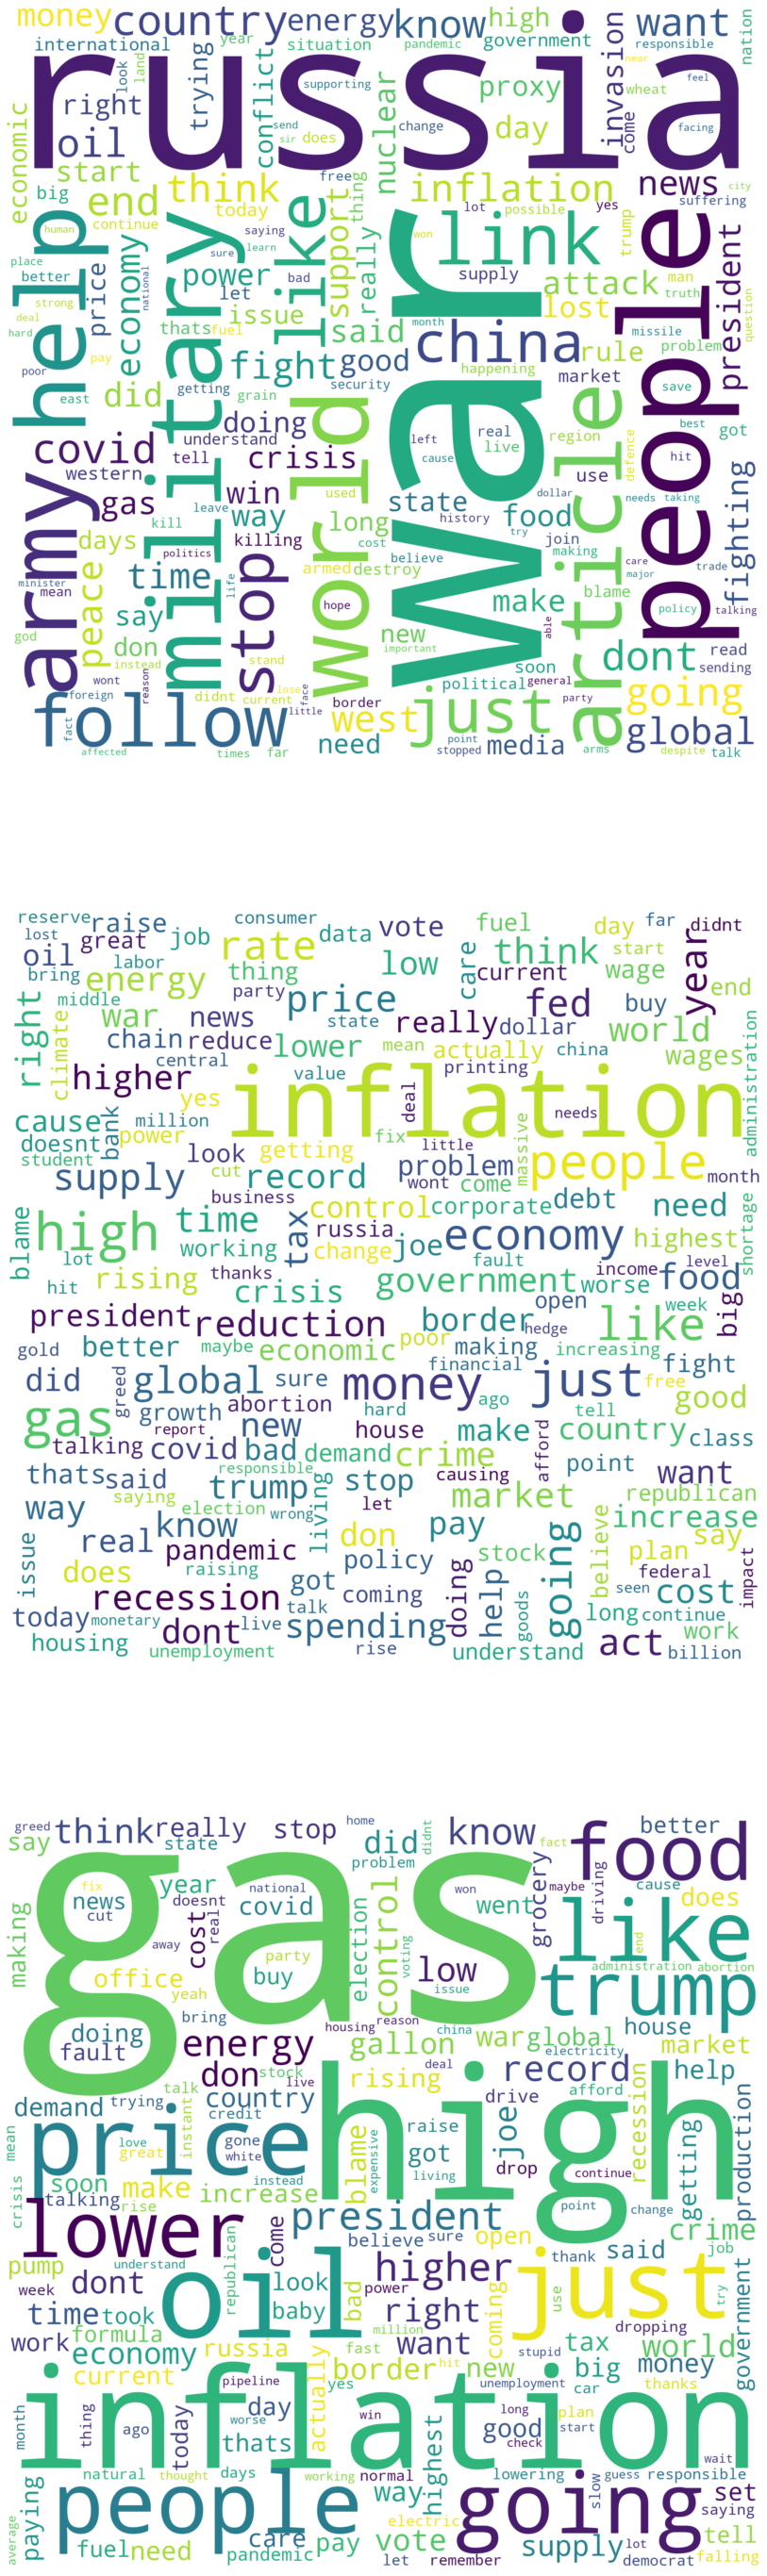

In [43]:

fig=plt.figure(figsize=(50, 50))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds"+str(i)+".pdf")

## Clustering

### KMeans

In [44]:
print(MyDTM_DF)

       abandon  abandoned  ability  able  abortion  abroad  absolute  \
0            0          0        0     0         0       0         0   
1            0          0        0     0         0       0         0   
2            0          0        0     0         0       0         0   
3            0          0        0     0         0       0         0   
4            0          0        0     0         0       0         0   
...        ...        ...      ...   ...       ...     ...       ...   
15796        0          0        0     0         0       0         0   
15797        0          0        0     0         0       0         0   
15798        0          0        0     0         0       0         0   
15799        0          0        0     0         0       0         0   
15800        0          0        0     0         0       0         0   

       absolutely  absurd  accelerate  ...  yield  york  youd  young  younger  \
0               0       0           0  ...      0     

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

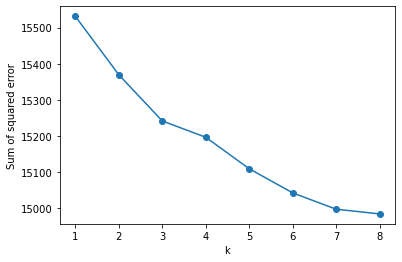

In [27]:
from sklearn.cluster import KMeans
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(tfidfDF)
    ssd.append(kmeans.inertia_)
    
plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents='ascii',lowercase=True,stop_words='english',max_features = 5000)
tfidfX = tfidf.fit_transform(textLIST)
tfidfDF = pd.DataFrame(tfidfX.toarray(),columns=tfidf.get_feature_names())

In [39]:
tfidfDF.drop(fin_col, axis=1, inplace=True)

In [41]:
tfidfDF

,abandon,abandoned,ability,able,abortion,abroad,absolute,absolutely,absurd,accelerate,...,yield,york,youd,young,younger,youth,youve,yoy,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(tfidfDF)

KMeans(n_clusters=3)

In [64]:
kmeans_preds=kmeans.predict(tfidfDF)
kmeans_labels=kmeans.labels_
DF_Count=tfidfDF

In [81]:
x=DF_Count["russia"]  
y=DF_Count["oil"]    
z=DF_Count["war"]  
colnames=DF_Count.columns

/var/folders/rg/npqplhfd76xfyvddqfbtkvz40000gn/T/ipykernel_13151/3119947131.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)


[0.00017387 0.00032913 0.00035488]
[8.74121048e-05 3.60026543e-04 4.61447275e-04]
(0.0001738688475273847, 8.741210479707738e-05)


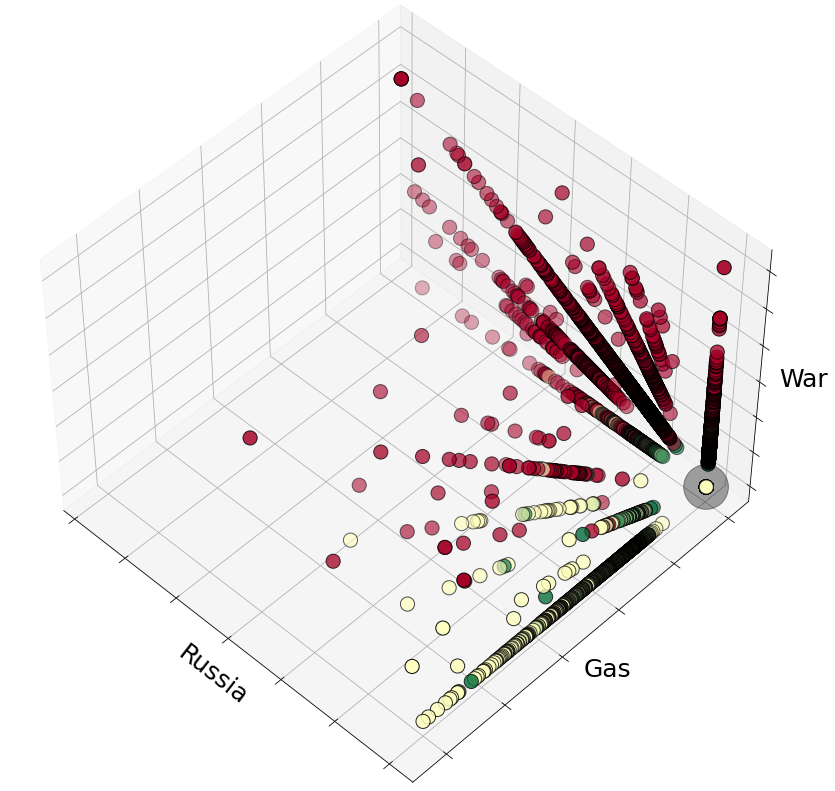

In [82]:
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=kmeans_preds)
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])

ax1.set_xlabel('Russia', fontsize=25)
ax1.set_ylabel('Oil', fontsize=25)
ax1.set_zlabel('War', fontsize=25)
#plt.show()
        
centers = kmeans.cluster_centers_

C1=centers[0,(1,2,14)]
print(C1)
C2=centers[1,(1,2,14)]
print(C2)
xs=C1[0],C2[0]
print(xs)
ys=C1[1],C2[1]
zs=C1[2],C2[2]


ax1.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()